#### **Importación de Librerías**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd

#### **Seteo de la Configuración de Gráficos**

In [2]:
plt.style.use("ggplot")
sns.set_palette("Set2")

#### **Carga de Datos**

In [3]:
df = pd.read_csv("data/AB_NYC_2019.csv")

#### **Vista Inicial**

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### **Dimensiones del dataset**

In [5]:
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

Filas: 48895
Columnas: 16


#### **Información Básica**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### **Estadísticas Descriptivas**

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### **Creación de Copia del Dataset**

In [8]:
df_clean = df.copy()

In [9]:
# Conteo de valores nulos
print("Valores de nulos antes de limpiar:")
df_clean.isnull().sum()

Valores de nulos antes de limpiar:


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### **LIMPIEZA DE VALORES NULOS EN LA COPIA**

En el dataset se detectan en 4 columnas valores nulos. Se realizará el siguiente proceso:

- `name` (16 nulos): nombre del alojamiento -> reemplazamos por `"Desconocido"`.  
- `host_name` (21 nulos): nombre del anfitrión -> reemplazamos por `"Desconocido"`.  
- `last_review` (10.052 nulos) y `reviews_per_month` (10.052 nulos):  
  Estas columnas están directamente relacionadas con las reseñas, pero no son esenciales para el análisis.  
  -> Por simplicidad, las eliminamos del dataset limpio.  

#### **Imputar con "Desconocido" manteniendo las filas**

In [10]:
df_clean["name"] = df_clean["name"].fillna("Desconocido")
df_clean["host_name"] = df_clean["host_name"].fillna("Desconocido")

#### **Eliminar columnas innecesarias (`last_review` , `review_per_month`)**


In [11]:
df_clean.drop(columns=["last_review", "reviews_per_month"], inplace=True, errors='ignore')

#### **Verificación Final**

In [12]:
print("\nValores nulos después de limpiar:")
print(df_clean.isnull().sum())


Valores nulos después de limpiar:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


#### **Confirmamos que el Dataset original sigue con nulos**


In [13]:
print("\nValores nulos en df (original):")
print(df.isnull().sum())


Valores nulos en df (original):
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


### **VARIABLES CATEGÓRICAS**

Aquí se analiza variables cualitativas como:
- `room_type`: tipo de habitación (entero, privado, compartido).  
- `neighbourhood`: barrio donde se ubica el alojamiento.  

Se utiliza gráficos de barras (`countplot`, `barplot`) para responder:  
- ¿Qué tipo de habitaciones predominan?  
- ¿Cuáles son los barrios más comunes?  
- ¿Cómo varía el precio promedio según tipo de habitación?

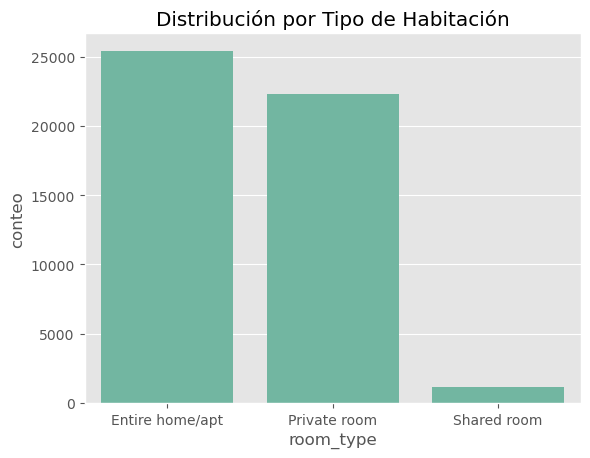

In [30]:
# Distribución por tipo de habitación
sns.countplot(data=df_clean, x="room_type", order=df_clean["room_type"].value_counts().index)
plt.title("Distribución por Tipo de Habitación")
plt.xlabel("room_type")
plt.ylabel("conteo")
plt.savefig("output/distribucion_room_type.png", dpi=300, bbox_inches="tight")
plt.show()

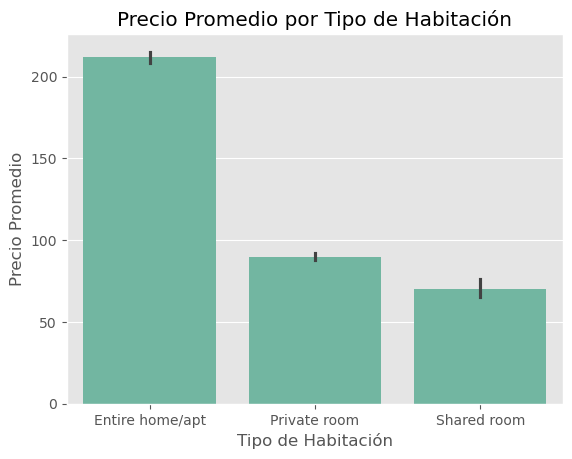

In [42]:
# Precio promedio por tipo de habitación
sns.barplot(data=df_clean, x="room_type", y="price",
            estimator=np.mean, order=df_clean["room_type"].value_counts().index)
plt.title("Precio Promedio por Tipo de Habitación")
plt.xlabel("Tipo de Habitación")
plt.ylabel("Precio Promedio")
plt.savefig("output/precio_promedio_room_type.png", dpi=300, bbox_inches="tight")
plt.show()

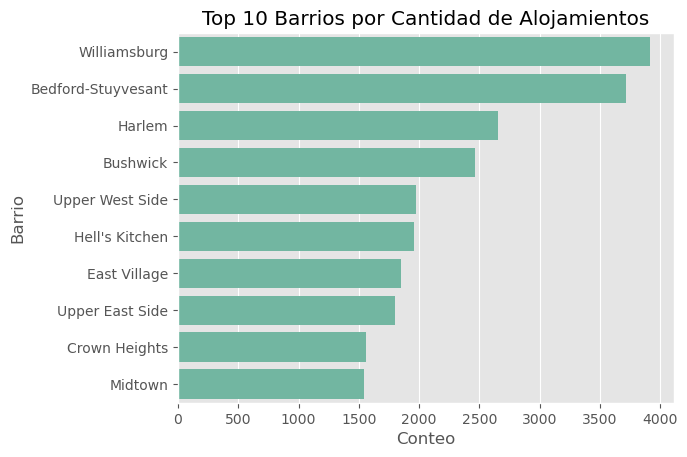

In [41]:
# Top 10 barrios por cantidad de alojamientos
top10_barrio = (df_clean["neighbourhood"]
                .value_counts()
                .head(10)
                .index)
sns.countplot(data=df_clean[df_clean["neighbourhood"].isin(top10_barrio)],
              y="neighbourhood",
              order=top10_barrio)
plt.title("Top 10 Barrios por Cantidad de Alojamientos")
plt.xlabel("Conteo")
plt.ylabel("Barrio")
plt.savefig("output/top10_barrios.png", dpi=300, bbox_inches="tight")
plt.show()

### **VARIABLES NÚMERICAS**

A continuación se exploran variables cuantitativas como:
- `price` (precio por noche).  
- `minimum_nights` (mínimo de noches).  

Se utilizan histogramas y boxplots para detectar:
- Distribuciones sesgadas.  
- Valores extremos (outliers) que distorsionan la lectura.  

Esto ayuda a comprender el comportamiento numérico de las variables clave.

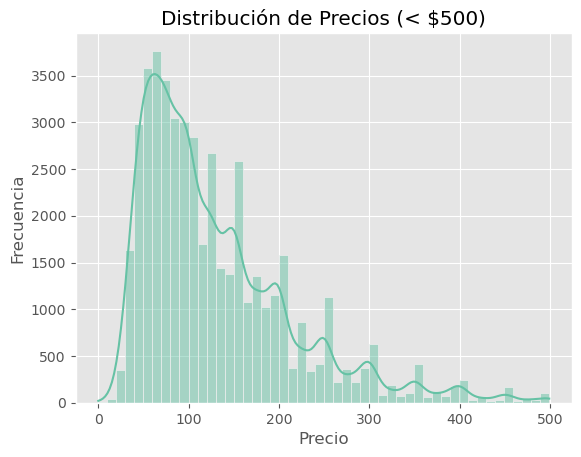

In [38]:
# Histograma de precios (cap a 500 para ver la masa principal)
sns.histplot(df_clean.loc[df_clean["price"] < 500, "price"], bins=50, kde=True)
plt.title("Distribución de Precios (< $500)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.savefig("output/distribucion_precios.png", dpi=300, bbox_inches="tight")
plt.show()

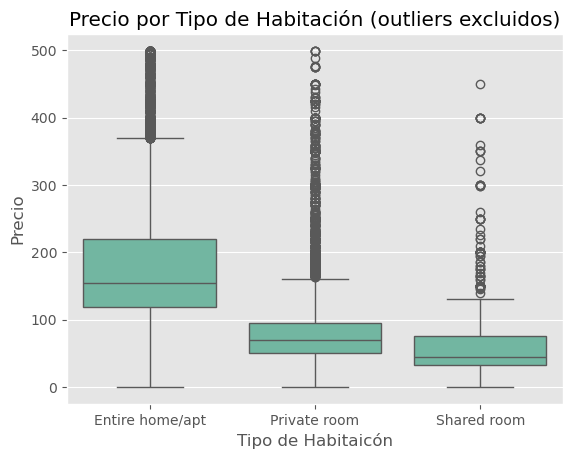

In [44]:
# Boxplot de precio por tipo de habitación (cap a 500 para legibilidad)
sns.boxplot(data=df_clean[df_clean["price"] < 500], x="room_type", y="price",
            order=df_clean["room_type"].value_counts().index)
plt.title("Precio por Tipo de Habitación (outliers excluidos)")
plt.xlabel("Tipo de Habitaicón")
plt.ylabel("Precio")
plt.savefig("output/boxplot_precios.png", dpi=300, bbox_inches="tight")
plt.show()


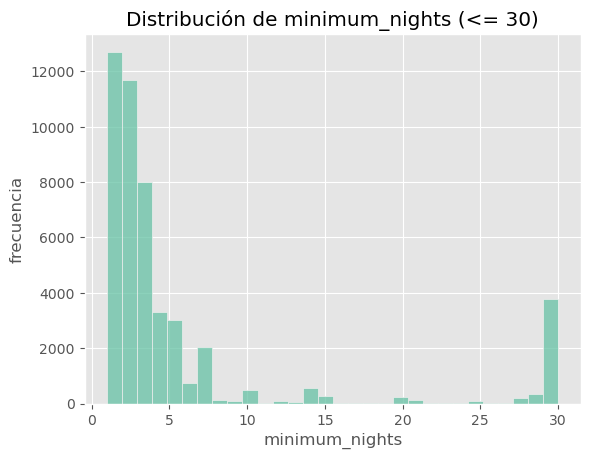

In [19]:
# Distribución de minimum_nights (cap a 30)
sns.histplot(df_clean.loc[df_clean["minimum_nights"] <= 30, "minimum_nights"], bins=30, kde=False)
plt.title("Distribución de minimum_nights (<= 30)")
plt.xlabel("minimum_nights"); plt.ylabel("frecuencia")
plt.show()

#### **Análisis Geográfico (Interactivo)**

Con `plotly` se va a generar un **mapa interactivo**:
- Cada punto es un alojamiento, geolocalizado con `latitude` y `longitude`.  
- El color representa el tipo de habitación.  
- El tamaño refleja el precio.  

El objetivo es analizar la **distribución espacial** de alojamientos y precios en Nueva York. 

In [20]:
# Muestra para performance (ajusta si tienes buen hardware)
sample_geo = df_clean.sample(min(5000, len(df_clean)), random_state=42)

# Nueva función: scatter_map
fig = px.scatter_map(
    sample_geo,
    lat="latitude",
    lon="longitude",
    color="room_type",
    size="price",
    hover_name="name",
    hover_data={
        "neighbourhood": True,
        "price": True,
        "minimum_nights": True,
        "latitude": False,
        "longitude": False
    },
    zoom=11,
    height=600,
    map_style="carto-positron"   # estilos disponibles: "open-street-map", "carto-positron", "stamen-terrain", etc.
)

fig.update_layout(title="Airbnb NYC – Distribución geográfica por tipo de habitación")
fig.show()

#### **Correlaciones**

A continuación se calcula la **matriz de correlación** con variables numéricas:
- Precio.  
- Número de reseñas.  
- Disponibilidad anual.  
- Minimo de Noches.  

Esta matriz se visualiza con un **heatmap** para detectar relaciones entre variables.  
Ejemplo: si el precio se relaciona con la disponibilidad o la cantidad de reseñas.

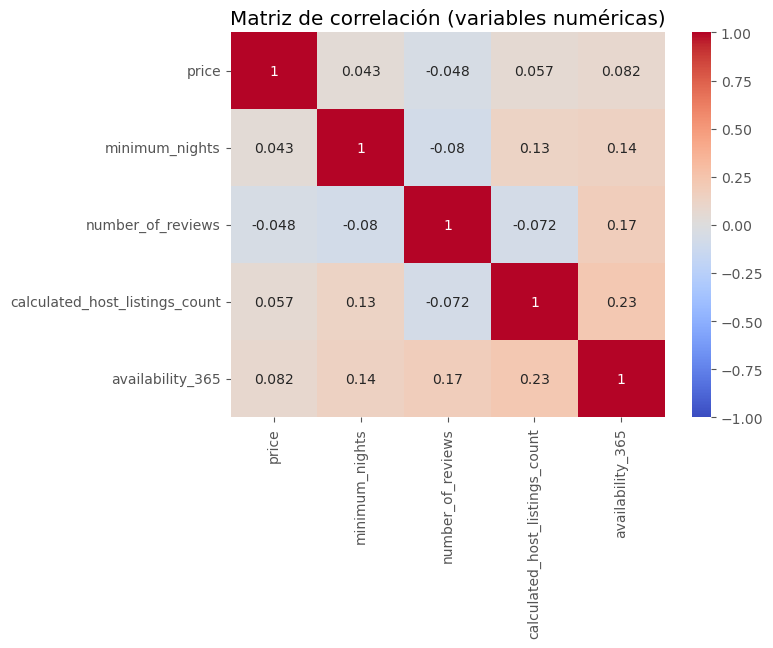

In [ ]:
# Selección numéricas relevantes
num_cols = ["price", "minimum_nights", "number_of_reviews",
            "calculated_host_listings_count", "availability_365"]

corr = df_clean[num_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de correlación (variables numéricas)")
plt.show()

#### **Detección y Tratamiento de Outliers (IQR)**

#### Tratamiento de outliers con Regla IQR
- Utiizaremos la **Regla IQR** (Q3 - Q1) para identificar valores extremos.  
- Capamos extremos en `price` y `minimum_nights` para mejorar visualizaciones y métricas.


              price  minimum_nights
count  48895.000000    48895.000000
mean     152.720687        7.029962
std      240.154170       20.510550
min        0.000000        1.000000
25%       69.000000        1.000000
50%      106.000000        3.000000
75%      175.000000        5.000000
max    10000.000000     1250.000000

========= Después de capear =========

          price_cap  minimum_nights_cap
count  48895.000000         48895.00000
mean     132.979753             3.82532
std       83.530504             3.32072
min        0.000000             1.00000
25%       69.000000             1.00000
50%      106.000000             3.00000
75%      175.000000             5.00000
max      334.000000            11.00000


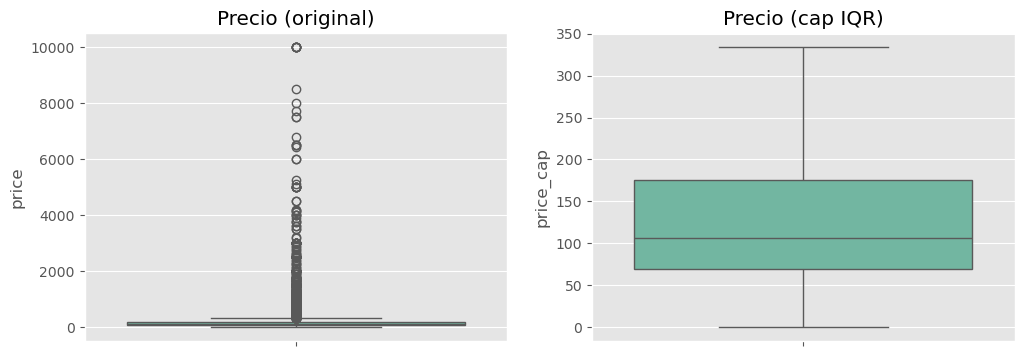

In [23]:
# Devuelve la serie con winsorization por IQR (cap en límites inferiores/superiores)
def cap_outliers_iqr(s, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k*iqr
    upper = q3 + k*iqr
    return s.clip(lower, upper)

# Creamos una versión cappeada (no sobrescribimos df_clean)
df_cap = df_clean.copy()
df_cap["price_cap"] = cap_outliers_iqr(df_cap["price"], k=1.5)
df_cap["minimum_nights_cap"] = cap_outliers_iqr(df_cap["minimum_nights"], k=1.5)

print(df_clean[["price","minimum_nights"]].describe())
print("\n========= Después de capear =========\n")
print(df_cap[["price_cap","minimum_nights_cap"]].describe())

# Comparativa visual rápida
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(y=df_clean["price"], ax=ax[0])
ax[0].set_title("Precio (original)")
sns.boxplot(y=df_cap["price_cap"], ax=ax[1])
ax[1].set_title("Precio (cap IQR)")
plt.show()

#### **Features Útiles para el EDA**

In [25]:
# Precio promedio por sector y tipo de habitación
price_barrio = (df_cap
                .groupby(["neighbourhood", "room_type"], as_index=False)["price_cap"]
                .mean()
                .rename(columns={"price_cap": "mean_price"}))

display(price_barrio.sort_values("mean_price", ascending=False).head(10))

,neighbourhood,room_type,mean_price
205,Fort Wadsworth,Entire home/apt,334.000000
536,Woodrow,Entire home/apt,334.000000
411,Riverdale,Shared room,334.000000
482,Tribeca,Entire home/apt,287.496503
439,South Beach,Entire home/apt,275.000000
341,Neponsit,Entire home/apt,269.333333
185,Flatiron District,Entire home/apt,258.723077
349,NoHo,Entire home/apt,250.845070
502,Vinegar Hill,Shared room,250.000000
342,New Brighton,Entire home/apt,249.000000


### **Insights Preliminares**

A partir de los gráficos generados en el EDA del dataset de Airbnb NYC, podemos destacar los siguientes hallazgos:

1. **Tipos de habitación y precios**
   - La mayoría de los alojamientos corresponden a *Entire home/apt* y *Private room*.  
   - El tipo *Shared room* es marginal en comparación.  
   - En cuanto a precios, los *Entire home/apt* presentan valores promedio mucho más altos que *Private room* o *Shared room*.  
   - Esto confirma que el tipo de habitación es una de las variables más influyentes en la formación del precio.

2. **Distribución de precios**
   - La gran mayoría de los alojamientos se concentra bajo los **$500 USD** por noche.  
   - Existen valores extremos (outliers) que alcanzan hasta los **$10.000 USD**, lo que justifica el uso de técnicas de capeo con IQR.  
   - Después del tratamiento de outliers, se observa que la mediana de precios se estabiliza alrededor de **$100 USD - 120 USD**.

3. **Duración mínima de estadía**
   - La variable `minimum_nights` muestra que la mayoría de los alojamientos tienen un mínimo de entre **1 y 5 noches**.  
   - Existen valores atípicos con estadías mínimas extremadamente largas (incluso mayores a un año), que no representan la realidad de la mayoría de los anuncios.

4. **Distribución geográfica**
   - La mayor concentración de alojamientos se encuentra en **Manhattan** y **Brooklyn**.  
   - En Manhattan predominan precios más altos y una mayor oferta de *Entire home/apt*.  
   - Los puntos en el mapa reflejan cómo los precios se distribuyen espacialmente, con áreas centrales más caras en comparación con zonas periféricas.

5. **Correlaciones entre variables**
   - Las correlaciones numéricas son en general **bajas**.  
   - `availability_365` y `calculated_host_listings_count` muestran una correlación positiva moderada, lo que sugiere que los hosts con más propiedades tienden a ofrecerlas con mayor disponibilidad.  
   - No se observa una correlación fuerte entre `price` y las demás variables numéricas, lo que indica que el precio depende más de factores categóricos (tipo de habitación, ubicación).

---

### **Conclusión preliminar**
El análisis exploratorio revela que:
- El **tipo de habitación y la ubicación** son factores clave en el precio.  
- Los **outliers** afectan fuertemente la visualización y deben ser tratados para obtener análisis más representativos.  
- Manhattan concentra la oferta más costosa, mientras que otros barrios como Brooklyn ofrecen alternativas más económicas.  
- Las variables numéricas no explican por sí solas la variación de precios, lo que abre espacio a modelos más complejos si se quisiera avanzar hacia machine learning.



#### **Guardado de Dataset Limpio y Cappeado**

In [26]:
df_clean.to_csv("data/airbnb_clean.csv", index=False)
df_cap.to_csv("data/airbnb_cap.csv", index=False)
print("¡Archivos guardados!")

¡Archivos guardados!
